In [ ]:
import pandas as pd
messages = pd.read_csv('C:/Users/ADMIN/Desktop/spam_ham_dataseteditted.csv')
print(messages)
##data cleansing

import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps=PorterStemmer()
messages['text'] = messages['text'].astype(str)

corpus=[]
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages['text'][i])
    review=review.lower()
    review=review.split()
    print(review)
    review = [ps.stem(word) for word in review if not word in stopwords.words("english")]
    review=' '.join(review)
    corpus.append(review)
    print(corpus)

##BOW  creation-->CountVectorizer


https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html


#lass sklearn.feature_extraction.text.CountVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)[source]
#Convert a collection of text documents to a matrix of token counts.

#This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.

#If you do not provide an a-priori dictionary and you do not use an analyzer that does some kind of feature selection then the number of features will be equal to the vocabulary size found by analyzing the data.


from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(max_features=2500,binary=True)

#If you’re referring to fit_transform() in the context of CountVectorizer, here’s how it works:
#fit_transform(): This method combines two actions:
#fit: Learns the vocabulary from the given dataset (i.e., it finds all unique words or n-grams up to the max_features limit).
#transform: Converts the dataset into a matrix of features based on the vocabulary learned in fit.

cv.fit_transform(corpus).toarray()

##ngrams__>sklearn ngrams

cv.vocabulary_

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=100,binary=True,ngram_range=(1,1))
X=cv.fit_transform(corpus).toarray()











    


In [ ]:
(1,1) only one word combination
(1,2) only two word combinaton-->bigram
(1,3) only three word combinaton-->trigram


In [ ]:
##bigram

cv=CountVectorizer(max_features=200,binary=True,ngram_range=(1,3))
X=cv.fit_transform(corpus).toarray()
X

In [ ]:
##TF IDF##

https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

TF=(no fo rep of words in sentence/(no of words in sentence)) 

IDF=logc(no of sentences/(no of sentences containing the word))

final=TF*IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid=TfidfVectorizer(max_features=100)
X=tfid.fit_transform(corpus).toarray()

import numpy as np
np.set_printoptions(edgeitems=30,linewidth=10000,
                    formatter=dict(float=lambda x: "%.3g" % x))
print(X)

In [ ]:
!pip install --upgrade scipy


In [ ]:
##Word2Vec

!pip install gensim
import gensim

from gensim.models import Word2Vec, KeyedVectors

import gensim.downloader as api

wv=api.load('word2vec-google-news-300')
vec=wv['king']
vec




In [ ]:
#!pip install cython
#!pip install --no-cache-dir --force-reinstall gensim

#!pip install --upgrade gensim

import gensim.downloader as api

wv=api.load('word2vec-google-news-300')
vec=wv['king']
vec


In [1]:
import pandas as pd
cs=pd.read_csv("C:/Users/ADMIN/Downloads/dawg/labels.csv")
cs

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [3]:
print(cs.describe())
print(cs.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


<Axes: xlabel='breed'>

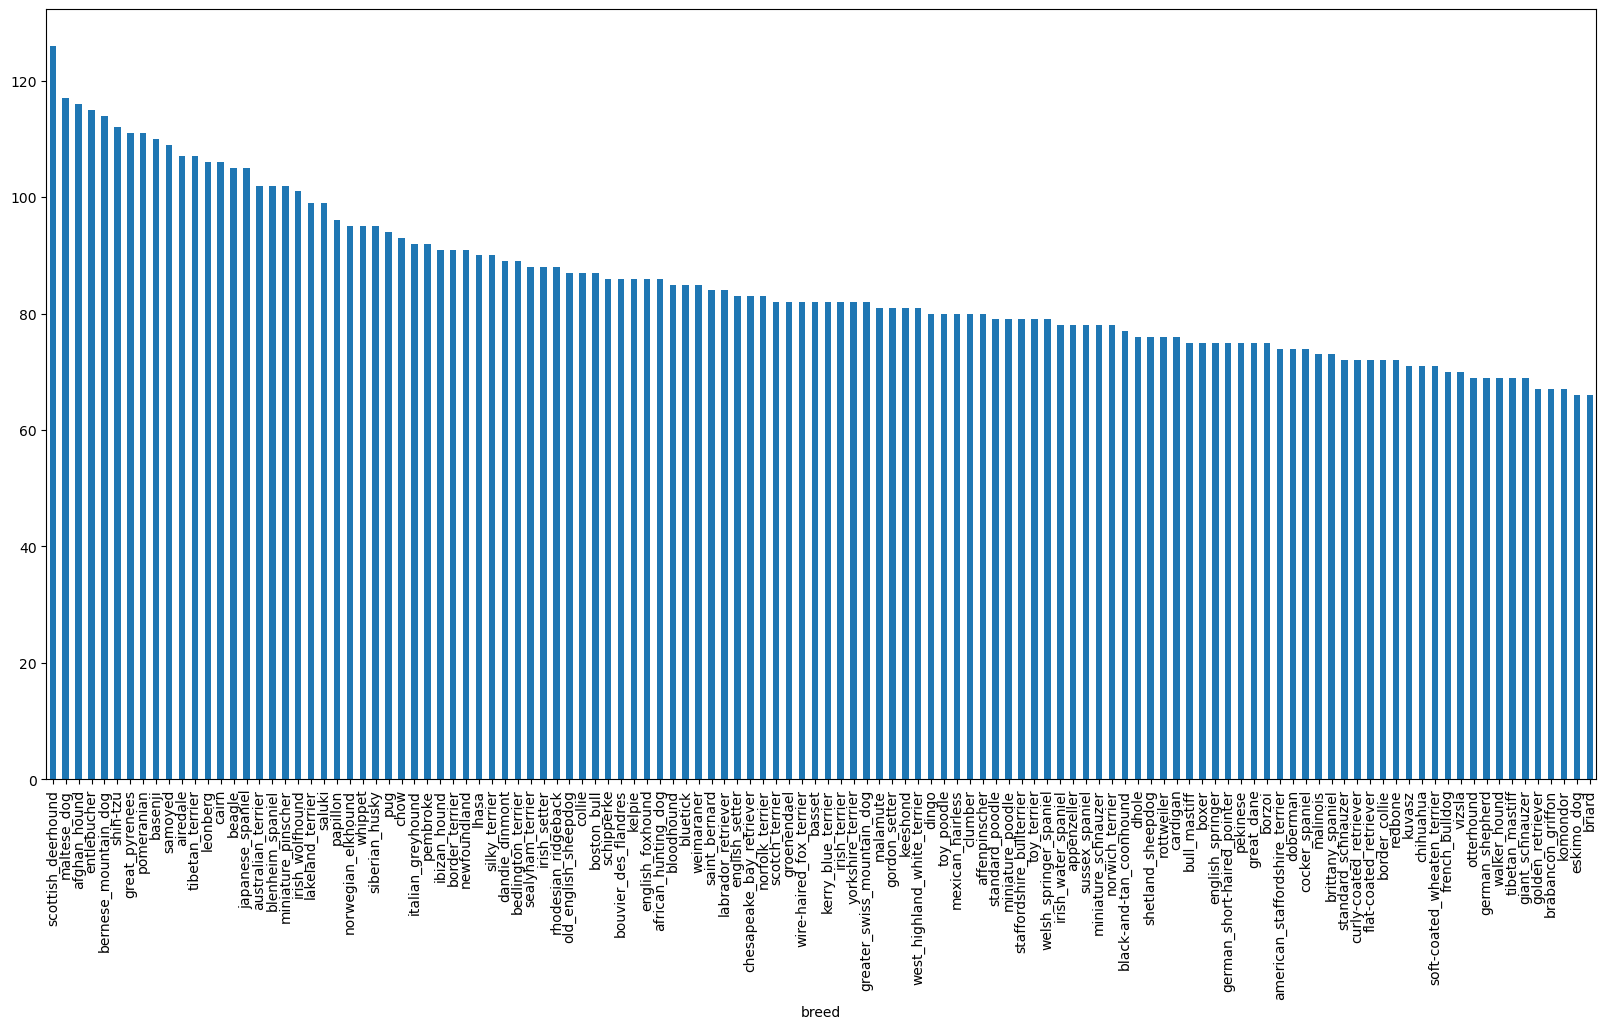

In [5]:
cs["breed"].value_counts().plot.bar(figsize=(20,10))

In [7]:
cs["breed"].value_counts().median()

82.0

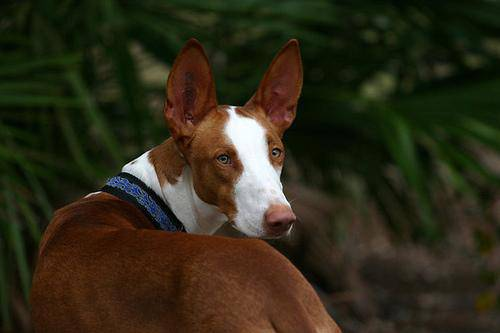

In [9]:
from IPython.display import Image
Image("C:/Users/ADMIN/Downloads/dawg/train/fe5e4ee18529af1af1861efd550561a3.jpg")

In [11]:


file=["C:/Users/ADMIN/Downloads/dawg/train/" + fname + ".jpg" for fname in cs["id"]]

file[:10]

['C:/Users/ADMIN/Downloads/dawg/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'C:/Users/ADMIN/Downloads/dawg/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'C:/Users/ADMIN/Downloads/dawg/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'C:/Users/ADMIN/Downloads/dawg/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'C:/Users/ADMIN/Downloads/dawg/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'C:/Users/ADMIN/Downloads/dawg/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'C:/Users/ADMIN/Downloads/dawg/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'C:/Users/ADMIN/Downloads/dawg/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'C:/Users/ADMIN/Downloads/dawg/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'C:/Users/ADMIN/Downloads/dawg/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [13]:
#checking whether the files name are same as the comp file os names
#imp
import os 
if len(os.listdir("C:/Users/ADMIN/Downloads/dawg/train/")) == len(file):
    print("matched")
else:
    print("not matched")

matched


In [15]:
###turn the labels to tensors(numberzs)
import numpy as np
labels=cs["breed"]
labels=np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [17]:
##find unique values

uni=np.unique(labels)
uni

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [19]:
len(uni)

120

In [21]:
### turn a single label to array of boolean

print(labels[0])
labels[0]==uni

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [23]:
bool=[i == uni for i in labels]
bool[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [25]:
len(bool)

10222

In [27]:
### example bool to int

print(labels[0])
print(np.where(uni == labels[0])) ##index where laberls occur

boston_bull
(array([19], dtype=int64),)


In [29]:
print(bool[0].argmax()) #index where label occur sdin bool array

19


In [31]:
print(bool[0].astype(int)) #bool-->int

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [33]:
####validation set setup 
x=file 
y=bool
len(cs)


10222

In [35]:
#set numbers of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000,max:10000}
NUM_IMAGES

1000

In [37]:
from sklearn.model_selection import train_test_split

#split them into trainign and validaiton
x=file 
y=bool
x_train , x_val, y_train , y_val = train_test_split(x[:NUM_IMAGES],
                                                    y[:NUM_IMAGES],
                                                    test_size=0.2,    #20% to val and 80% to train
                                                    random_state=42)  #this is for value reproductuivbilirt

len(x_train),len(x_val),len(y_train),len(y_val)

(800, 200, 800, 200)

In [38]:
#training data
x_val[:5],y_train[:5]

(['C:/Users/ADMIN/Downloads/dawg/train/0ca9280205bd68d201e1d708db3f209d.jpg',
  'C:/Users/ADMIN/Downloads/dawg/train/12405b2e93417d81f5308769c4e184c7.jpg',
  'C:/Users/ADMIN/Downloads/dawg/train/1242da788ce85d4311e1cc9922a0a809.jpg',
  'C:/Users/ADMIN/Downloads/dawg/train/1015e4eba660def32e7e52b89fe3a9c6.jpg',
  'C:/Users/ADMIN/Downloads/dawg/train/09d5ac8026b8a7f7d1acae244765fe24.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, Fal

In [41]:
##Image to Tensor:PREPROCESS
"""
1.take a img as input
2.use tensorflow to read adn save it to a var , image(tensorflwo dataloading)
3.turn our iamge to tensors
4.resize the img to be a shape of (224,224)
5.return the modified img"""

'\n1.take a img as input\n2.use tensorflow to read adn save it to a var , image(tensorflwo dataloading)\n3.turn our iamge to tensors\n4.resize the img to be a shape of (224,224)\n5.return the modified img'

In [43]:
#img to np array

from matplotlib.pyplot import imread
image =imread(file[42])
image.shape

(257, 350, 3)

In [45]:
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [47]:
!pip install tensorflow



In [48]:
import tensorflow as tf
b=tf.constant(image)
b

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

In [50]:
##ow preprocess DEFINE Image SIZE

#https://www.bing.com/ck/a?!&&p=fad8409a07d99783JmltdHM9MTcyOTkwMDgwMCZpZ3VpZD0xMmJhYmQ0Ny03MTlhLTYwMDItMDQ0Zi1hOWQxNzAyNjYxYjImaW5zaWQ9NTIxMg&ptn=3&ver=2&hsh=3&fclid=12babd47-719a-6002-044f-a9d1702661b2&psq=looadimage+tensor&u=a1aHR0cHM6Ly93d3cudGVuc29yZmxvdy5vcmcvdHV0b3JpYWxzL2xvYWRfZGF0YS9pbWFnZXM&ntb=1

IMG_SIZE=224
#CREATE A 

#NORMALIZATION OF IMAGE FROM PIXELS TO FLOATS
def proces_image(image_path,img_size=IMG_SIZE):
    image=tf.io.read_file(image_path)#readimage

    image=tf.image.decode_jpeg(image,channels=3)#img-->rgb numerical tensor 

    image=tf.image.convert_image_dtype(image,tf.float32) #from 0-255 color channels to 0-1 beoz of tensor use
    image


    
    


In [52]:
tensor=tf.io.read_file(file[26])
tensor

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01\xf4\x01w\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca

In [53]:
tensor = tf.image.decode_jpeg(tensor,channels=3)
tf.image.convert_image_dtype(tensor,tf.float32)

"""Why Convert Image Tensors to a 0-1 Range?
Most machine learning models, especially deep learning models, perform better with data normalized to a common scale (e.g., 0 to 1 or -1 to 1). Here’s why:

Numerical Stability: Working with smaller, normalized values (0 to 1) avoids issues with large weights or activations that can cause numerical instability during training.

Gradient Calculations: Gradients computed with smaller, normalized values tend to be more stable, leading to smoother convergence.

Improved ModeL:Performance: Many models and algorithms are optimized for inputs in a specific range, especially when using common activation functions like ReLU or Sigmoid, which perform better with scaled input values.
"""




'Why Convert Image Tensors to a 0-1 Range?\nMost machine learning models, especially deep learning models, perform better with data normalized to a common scale (e.g., 0 to 1 or -1 to 1). Here’s why:\n\nNumerical Stability: Working with smaller, normalized values (0 to 1) avoids issues with large weights or activations that can cause numerical instability during training.\n\nGradient Calculations: Gradients computed with smaller, normalized values tend to be more stable, leading to smoother convergence.\n\nImproved ModeL:Performance: Many models and algorithms are optimized for inputs in a specific range, especially when using common activation functions like ReLU or Sigmoid, which perform better with scaled input values.\n'

In [58]:
##RESIZE THE IMAGE IZE

image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
image

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[ 84.257256 , 132.1836   ,  82.47823  ],
        [ 64.927666 , 112.91615  ,  61.523296 ],
        [ 66.534386 , 114.158066 ,  61.640205 ],
        ...,
        [ 75.74909  , 131.7491   ,  82.83656  ],
        [ 75.91483  , 133.79053  ,  85.85268  ],
        [ 75.85268  , 133.79973  ,  85.958565 ]],

       [[ 67.493095 , 114.71407  ,  70.35763  ],
        [ 63.500698 , 111.378975 ,  65.390274 ],
        [ 73.39411  , 121.30434  ,  73.997284 ],
        ...,
        [ 71.84103  , 127.84103  ,  80.4705   ],
        [ 74.06341  , 130.30685  ,  83.62709  ],
        [ 73.779015 , 130.93596  ,  85.27867  ]],

       [[ 55.03174  , 103.40004  ,  67.78397  ],
        [ 63.25816  , 111.00495  ,  73.951385 ],
        [ 75.021904 , 122.39697  ,  83.78076  ],
        ...,
        [ 67.71429  , 123.495605 ,  78.63839  ],
        [ 70.57589  , 126.20759  ,  82.3125   ],
        [ 72.528114 , 128.61385  ,  84.71875  ]],

       ...,

     

In [60]:
###data into batches helpful in categorizing data
def process_image(image_path,img_size=IMG_SIZE):
    image=tf.io.read_file(image_path)#readimage

    image=tf.image.decode_jpeg(image,channels=3)#img-->rgb numerical tensor 

    image=tf.image.convert_image_dtype(image,dtype=tf.float32) #from 0-255 color channels to 0-1 beoz of tensor use
    image
    tensor=tf.io.read_file(file[26])
    tensor
    # Read the image file
    tensor = tf.io.read_file(image_path)
    
    # Decode the image
    image = tf.image.decode_jpeg(tensor, channels=3)
    
    # Convert the image to float32 and normalize it
    image = tf.image.convert_image_dtype(image, tf.float32)
    
    # Resize the image to the desired size
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
    
    return image  # Make sure to return the processed image


def get_image_label(image_path, label):
    image = process_image(image_path)  # Process the image from the image_path
    return image, label  # Return the processed image and labels
(process_image(x[42],y[42]))
   

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.3264178 , 0.5222886 , 0.3232816 ],
        [0.2537167 , 0.44366494, 0.24117759],
        [0.25699762, 0.4467087 , 0.23893751],
        ...,
        [0.29325107, 0.5189916 , 0.3215547 ],
        [0.29721776, 0.52466875, 0.33030328],
        [0.2948505 , 0.5223015 , 0.33406618]],

       [[0.25903144, 0.4537807 , 0.27294815],
        [0.24375686, 0.4407019 , 0.2554778 ],
        [0.2838985 , 0.47213382, 0.28298813],
        ...,
        [0.2785345 , 0.5027992 , 0.31004712],
        [0.28428748, 0.5108719 , 0.32523635],
        [0.28821915, 0.5148036 , 0.32916805]],

       [[0.20941195, 0.40692952, 0.25792548],
        [0.24045378, 0.43900946, 0.2868911 ],
        [0.29001117, 0.47937486, 0.32247734],
        ...,
        [0.26074055, 0.48414773, 0.30125174],
        [0.27101526, 0.49454468, 0.32096273],
        [0.27939945, 0.5029289 , 0.32934693]],

       ...,

       [[0.00634795, 0.03442048, 0.0258106 ],
        [0.01

In [62]:
result = (process_image(x[42]), tf.constant(y[42]) )
result

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [448]:
#turning x and y into batches

import tensorflow as tf
BATCH_SIZE=32

##function

def create_data_batches(x,y=None,batch_size=BATCH_SIZE, valid_data=False,test_data=False):

    #if the data is a test dataset , we dont need them label them ( no label so process_image )
    if test_data:
        print("creating test batches")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(x)))
        data_batch=data.map(process_image).batch(BATCH_SIZE)
        return data_batch

    #if the data is valid dataset, we dont need to shuffle them ( both image and labels so get_image_label )
    elif valid_data:
        print("creating valid data batches")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                                 tf.constant(y)))
        data_batch=data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch

    else:
        print("creating training data batches")
        #truning filepaths and labels into tensors
        data=tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                                 tf.constant(y)))
        #shuffling pathnames and labels before mapping image processor fucntion is faster than  shuffling
        data = data.shuffle(buffer_size=len(x))
        data=data.map(get_image_label)

        #training data into batches
        data_batch=data.batch(BATCH_SIZE)
        return data_batch 
        
        
    

In [450]:
train_data=create_data_batches(x_train,y_train)
val_data=create_data_batches(x_val,y_val,valid_data=True)

creating training data batches
creating valid data batches


In [68]:
train_data.element_spec,val_data.element_spec


"""Explanation of train_data.element_spec and val_data.element_spec
Structure of element_spec:

element_spec provides a description of the shape and type of each element that the dataset will yield.
It is a tf.TypeSpec object that contains information about the tensor(s) produced by the dataset.
Typical Output Structure:

When you inspect element_spec, you will often see a tuple indicating that the dataset yields two items:
The first item is the processed image tensor.
The second item is the label tensor.
For example, the output might look like this:
css
Copy code
((None, None, 3), (None, 120))
This indicates that:
The first part of the tuple corresponds to the image data, which has an unspecified height and width (both set to None) but has a channel dimension of 3 (for RGB images).
The second part corresponds to the label data, which has an unspecified batch size (also set to None) and a fixed size of 120 (the number of classes or dimensions in your label).
Understanding the Elements:

Images:
The images are typically represented as 3D tensors: [batch_size, height, width, channels].
The use of None allows for flexibility in batch size and image dimensions.
Labels:
Labels can be represented as 1D tensors for binary classification (with shape [batch_size]) or as 2D tensors for multi-class classification (with shape [batch_size, num_classes]).
In your case, if the shape is (None, 120), it indicates that each label tensor can hold 120 boolean values (indicating the presence or absence of certain classes).
Example Usage
Here's a brief example of how you might see element_spec in practice:

python
Copy code
train_data = create_data_batches(x_train, y_train)  # Assuming x_train and y_train are defined
val_data = create_data_batches(x_val, y_val, valid_data=True)  # Validation data

print("Training Data Element Spec:", train_data.element_spec)
print("Validation Data Element Spec:", val_data.element_spec)
If you run the above code, you might get output similar to:

mathematica
Copy code
fro i
Training Data Element Spec: ((None, 224, 224, 3), (None, 120))
Validation Data Element Spec: ((None, 224, 224, 3), (None, 120))
Summary
The element_spec is crucial for understanding the data that will flow through your model. It ensures that the shapes and types of your input data match what your model expects, thus avoiding shape mismatches during training or inference. If you encounter shape or type errors later in your pipeline, checking the element_spec of your datasets can help diagnose and fix these issues."""

'Explanation of train_data.element_spec and val_data.element_spec\nStructure of element_spec:\n\nelement_spec provides a description of the shape and type of each element that the dataset will yield.\nIt is a tf.TypeSpec object that contains information about the tensor(s) produced by the dataset.\nTypical Output Structure:\n\nWhen you inspect element_spec, you will often see a tuple indicating that the dataset yields two items:\nThe first item is the processed image tensor.\nThe second item is the label tensor.\nFor example, the output might look like this:\ncss\nCopy code\n((None, None, 3), (None, 120))\nThis indicates that:\nThe first part of the tuple corresponds to the image data, which has an unspecified height and width (both set to None) but has a channel dimension of 3 (for RGB images).\nThe second part corresponds to the label data, which has an unspecified batch size (also set to None) and a fixed size of 120 (the number of classes or dimensions in your label).\nUnderstandin

In [70]:
##visualizing data batches

import matplotlib.pyplot as plt

def show_25_img(images,labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
     ax=plt.subplot(5,5,i+1)
     plt.imshow(images[i])
     plt.title(uni[labels[i].argmax()])
     

In [72]:
uni[y[0].argmax()]

'boston_bull'

In [74]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

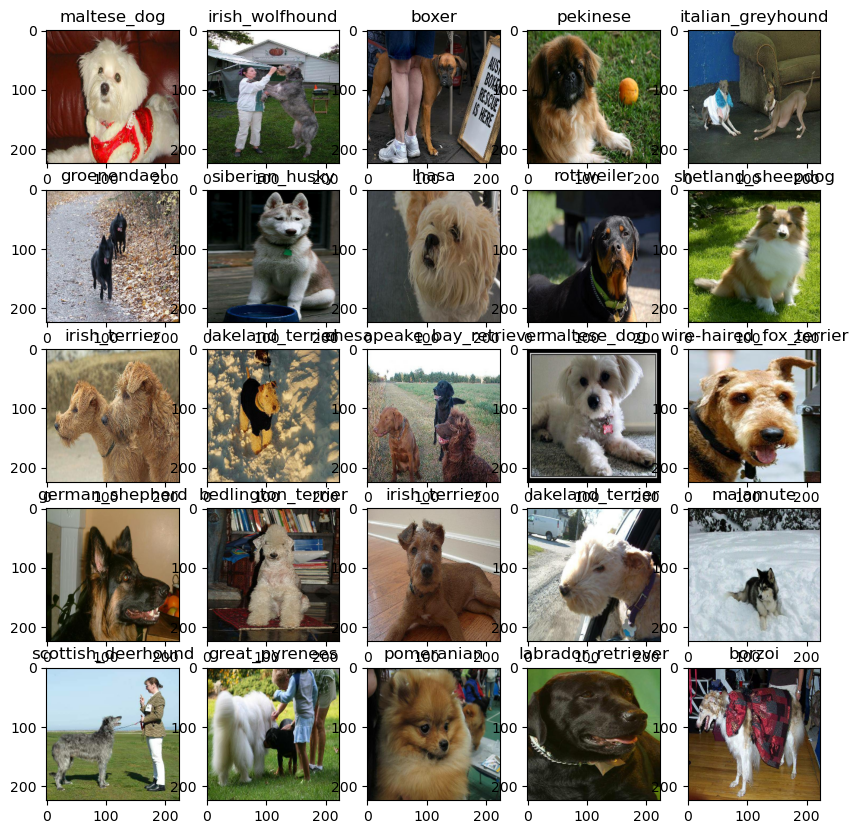

In [76]:
train_images,train_labels=next(train_data.as_numpy_iterator())

#as_numpy_iterator converttws datasets to numpy values

#The next() function in Python is used to retrieve the 
#next item from an iterator. If the iterator reaches the end, 
#it will either raise a StopIteration exception or, if a default value is specified,
#return that value instead.

len(train_images),len(train_labels)


show_25_img(train_images,train_labels)



In [77]:
"""building the model

imput-->algorithim-->output

imput shape in form of tensor shapes

output shape in form pf tesnor shapes

url of model we want ot use"""

'building the model\n\nimput-->algorithim-->output\n\nimput shape in form of tensor shapes\n\noutput shape in form pf tesnor shapes\n\nurl of model we want ot use'

In [80]:
###keras sewuential and functional 


#https://www.tensorflow.org/guide/keras/sequential_model


#HERE SEQUENTIAL IS BEING USED



#imput
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3]


#output
OUTPUT_SHAPE=len(uni)


#setup url model
MODEL_URL ="https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-classification/2"

#DEFINE THE MDOEL IN KERAS MODEL IN SEQUENTIAL MODEL

#COMPLIE THE MODEL

#BUILDS THE MODEL

# RETURN TJE MODEL




!pip install tensorflow_hub 
import tensorflow_hub as hub


In [81]:
"""m = tf.keras.Sequential([hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-classification/2")])
m.build([None, 128, 128, 3])"""

'm = tf.keras.Sequential([hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-classification/2")])\nm.build([None, 128, 128, 3])'

In [82]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [83]:
#import tensorflow as tf
import tensorflow_hub as hub
import tf_keras as tg

# Constants
IMG_SIZE = 224
INPUT_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
OUTPUT_SHAPE = 120
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/5"

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print("Building model with", model_url)

    # Define the model as Sequential
    model = tg.Sequential([
        tg.layers.Input(shape=input_shape),  # Define input shape here
        hub.KerasLayer(model_url, trainable=False),  # Load model from TensorFlow Hub
        tg.layers.Dense(units=output_shape, activation="softmax")  # Output layer
    ])

    # Compile the model
    model.compile(
        loss=tg.losses.CategoricalCrossentropy(),
        optimizer=tg.optimizers.Adam(),
        metrics=["accuracy"]
    )

    return model

# Instantiate and check the model summary
model = create_model()
model.summary()

                                
                                



Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/5




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 3660505 (13.96 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [86]:
pip install tf_keras

Note: you may need to restart the kernel to use updated packages.


In [87]:
pip install tensorflow==2.15.0 tenssorflow-hub keras==2.15.0

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.15.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)
ERROR: No matching distribution found for tensorflow==2.15.0


In [90]:
hwo the mdoel works
#https://www.bing.com/ck/a?!&&p=c26830d3b45bc74dJmltdHM9MTcyOTk4NzIwMCZpZ3VpZD0xMmJhYmQ0Ny03MTlhLTYwMDItMDQ0Zi1hOWQxNzAyNjYxYjImaW5zaWQ9NTI0Mg&ptn=3&ver=2&hsh=3&fclid=12babd47-719a-6002-044f-a9d1702661b2&psq=eli5+way+towards+data+science&u=a1aHR0cHM6Ly90b3dhcmRzZGF0YXNjaWVuY2UuY29tL2EtY29tcHJlaGVuc2l2ZS1ndWlkZS10by1jb252b2x1dGlvbmFsLW5ldXJhbC1uZXR3b3Jrcy10aGUtZWxpNS13YXktM2JkMmIxMTY0YTUz&ntb=1

SyntaxError: invalid syntax (1960499042.py, line 1)

In [ ]:
#callbacks-->helper fn a mdoel can use during trqainign to do such thingws as save its progress

#load tensorboard notebook
#cerate a tensorboard callback which is able to save logs to dorectrpry amd pass it to our model fn
#visualzie our mdoels training logs with the %tensorbaorfd magic fn

%load_ext tensorboard

In [117]:
import datetime
import os

#cerate a fn to build tensorboard callback

def create_tensorboard_callback():
    logdir=os.path.join("dawg/logs", #logs get stored here whenevr experiment is ran
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tg.callbacks.TensorBoard(logdir)


##early stopping callbacks-->stop training when the model stops imporving

#https://www.bing.com/ck/a?!&&p=af3b88de0d725676JmltdHM9MTcyOTk4NzIwMCZpZ3VpZD0xMmJhYmQ0Ny03MTlhLTYwMDItMDQ0Zi1hOWQxNzAyNjYxYjImaW5zaWQ9NTIwOA&ptn=3&ver=2&hsh=3&fclid=12babd47-719a-6002-044f-a9d1702661b2&psq=searly+callbask+tensorflow&u=a1aHR0cHM6Ly93d3cudGVuc29yZmxvdy5vcmcvYXBpX2RvY3MvcHl0aG9uL3RmL2tlcmFzL2NhbGxiYWNrcy9FYXJseVN0b3BwaW5n&ntb=1

#create early stopping callbacks

    early=tg.callbacks.EarlyStopping(monitor="val accuracy",
                                patience=3)

In [119]:
##training a model
import tensorflow as tf
NUM_EPOCHS=100
#check whether it is still running on gpu
print("GPU","avai" if tf.config.list_physical_devices("GPU") else "not avai")


GPU not avai


In [121]:
print("GPU","avai" if tf.config.list_physical_devices("GPU") else "not avai")


GPU not avai


In [144]:
#creata moddewl using create_model()
#create tensorbaord using create_tensorboard_callback()
#call the fit() fn on our mdeol passing it in trainigndata ,validation data,no of epochs to trian for (NUM_EPOCHS) adn the callbacks we liek to sue
#return the model
early=tg.callbacks.EarlyStopping(monitor="val_accuracy",
                                patience=3,
                                restore_best_weights=True)
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

def train_model():
    model = create_model()
    
    tensorboard=create_tensorboard_callback()

    model.fit(x=train_data,
              validation_data=val_data,
              epochs=10,
              validation_freq=1,
              callbacks=[tensorboard,early])

    return model
    

In [146]:
model = train_model()

Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/5
Epoch 1/10
25/25 [==============================] - 47s 654ms/step - loss: 4.6109 - accuracy: 0.1050 - val_loss: 3.4194 - val_accuracy: 0.2650
Epoch 2/10
25/25 [==============================] - 14s 551ms/step - loss: 1.5601 - accuracy: 0.6812 - val_loss: 2.1701 - val_accuracy: 0.4900
Epoch 3/10
25/25 [==============================] - 14s 552ms/step - loss: 0.5208 - accuracy: 0.9488 - val_loss: 1.7020 - val_accuracy: 0.5800
Epoch 4/10
25/25 [==============================] - 13s 535ms/step - loss: 0.2229 - accuracy: 0.9950 - val_loss: 1.5400 - val_accuracy: 0.6050
Epoch 5/10
25/25 [==============================] - 13s 527ms/step - loss: 0.1316 - accuracy: 0.9962 - val_loss: 1.4679 - val_accuracy: 0.6250
Epoch 6/10
25/25 [==============================] - 13s 534ms/step - loss: 0.0908 - accuracy: 0.9987 - val_loss: 1.4348 - val_accuracy: 0.6450
Epoch 7/10
25/25 [==============================] 

In [148]:
#check the tesorboard logs

#magic fn for acessinng log  directory

%tensorboard --logdir dawgs/logs

UsageError: Line magic function `%tensorboard` not found.


In [153]:
#evaluating predictions
val_data

predictions =model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 4s 332ms/step


array([[5.7782829e-03, 1.0071464e-03, 3.0113541e-04, ..., 6.2633900e-04,
        5.7510126e-05, 1.1799253e-03],
       [2.8454248e-04, 1.4028143e-03, 9.7655635e-03, ..., 7.2153241e-05,
        2.7263064e-03, 1.1378117e-05],
       [7.1235186e-06, 1.3707268e-04, 9.2375894e-06, ..., 2.9480019e-05,
        5.4975249e-06, 1.3064190e-03],
       ...,
       [1.6856287e-05, 2.6771947e-04, 3.8771814e-05, ..., 1.8711704e-05,
        5.6439108e-04, 1.3605677e-04],
       [5.4524688e-04, 1.2777354e-05, 4.3225418e-06, ..., 1.4256793e-05,
        1.1891067e-05, 6.0912751e-04],
       [8.0637205e-05, 6.1525301e-05, 7.6181546e-05, ..., 2.6343234e-03,
        7.4273231e-04, 4.2952690e-04]], dtype=float32)

In [157]:
predictions.shape

(200, 120)

In [161]:
len(predictions[0])

120

In [173]:
#1st prediction
index=88
print(predictions[0])
print(f"max value:{np.max(predictions[0])}")
print(f"sum:{np.sum(predictions[index])}")
print(f"max index {np.argmax(predictions[index])}")
print(f"predicited label : {uni[np.argmax(predictions[index])]}")

[5.77828288e-03 1.00714643e-03 3.01135413e-04 1.27359875e-04
 7.06531014e-03 2.71917117e-04 2.13764459e-02 7.25768798e-04
 2.69201817e-03 4.36437258e-04 5.71418612e-04 4.98061592e-04
 3.46032844e-04 1.82506032e-04 8.87118003e-05 8.79357860e-04
 1.65979931e-04 4.47760299e-02 4.10609391e-05 2.95068690e-04
 6.73029013e-03 1.42866033e-04 1.41195735e-04 1.34036446e-03
 3.30105278e-04 1.07052433e-03 6.90738931e-02 2.04035634e-04
 3.79305013e-04 3.32831463e-04 1.97675894e-04 2.40853662e-03
 5.83697460e-04 2.68104457e-04 3.08656090e-05 1.17676325e-01
 6.98920558e-05 2.30396725e-03 1.75705252e-04 5.42725727e-04
 1.01680658e-03 1.12513262e-04 5.77055398e-05 2.08236510e-03
 5.19642897e-04 4.42964549e-04 6.07780239e-05 8.79281957e-04
 7.39700859e-04 2.35985173e-03 8.72315286e-05 5.87595045e-04
 2.44808407e-03 4.48190112e-04 4.12560476e-04 3.98322190e-05
 4.60688432e-04 2.19791988e-03 1.04925211e-03 4.15356737e-03
 5.99399791e-04 2.10135608e-04 5.39401663e-04 2.38537701e-04
 1.00348936e-03 3.721076

In [192]:
#going to create a more effiecent and image printing model
#create a function

def get_pred_label(prediction_probabilities):
                    #tru an arrya of predictio  into label
                    return uni[np.argmax(prediction_probabilities)]

                    #get a predicted label bsed on array of prediction probqbailies

pred_label=get_pred_label(predictions[0])
pred_label
                    

                    



'soft-coated_wheaten_terrier'

In [194]:
pred_label

'soft-coated_wheaten_terrier'

In [254]:
##unbatch

def unbatchify(data):
    """take a batched dataset ofr(image,label) tensros adn return sepreate arays of images adn labels
"""
    images=[]
    labels=[]

    for image,label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(uni[np.argmax(label)])
    return images,labels

val_images,val_labels=unbatchify(val_data)
val_images[0],val_labels[0]

    

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [214]:
get_pred_label(val_images[0])

'vizsla'

In [216]:
get_pred_label(val_labels[0])

'cairn'

In [240]:
#we know the predicitona are all datasets. we will una]bacthify it an make predirtions on the validation images and then comapre thos predictiosn to the valdiation labels

#create a unbatched fn

#https://www.tensorflow.org/api_docs/python/tf/data/experimental/unbatch

image_=[]
labels_=[]

for image,label in val_data.unbatch().as_numpy_iterator():
  image_.append(image)
  labels_.append(label)
    
image_[0] , labels_[0]

val_images,val_labels=unbatchify(val_data)
val_images[0],val_labels[0]


AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [208]:
get_pred_label(labels_[0])

'cairn'

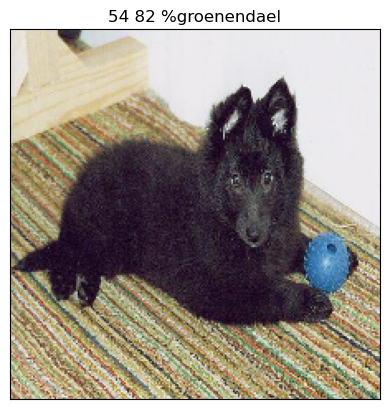

In [373]:
#predcions labels
#valid labels
#valid image

#visualize

#create fn:
#take an array of prediction prob , an array of truth labels and array of images nad intergers
#convert the predition probabilities to a predicted labels
#plot the predicted label , its preodiuctied pron, the truth label and target images on single plot

def plot_pred(prediction_probabilities,labels,images,n=1):
    pred_prob,true_label,image=prediction_probabilities[n],labels[n],images[n]
    

    pred_label  =get_pred_label(pred_prob)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    if np.array_equal(pred_label, true_label):  # Updated comparison
        color = "green"
    else:
        color="red"
        
    plt.title("{} {:2.0f} %{}".format(pred_label,
                                     np.max(pred_prob)*100,
                                     true_label,
                                     color=color))
plot_pred(prediction_probabilities=predictions,
         labels=val_labels,
         images=val_images,
         n=77)
    

In [375]:
#convert the predition probabilities to a predicted labels

"""take inputs of prediciton probab array amd ground truth array and int
   find the pre3d using get_pred_label()
preed indexes,values,labels"""

def plot_pred_conf(prediction_probabilities,labels , n=1):

    #top 10 predictions
    pred_prob,true_label = prediction_probabilities[n],labels[n]

    #get the predicted labels
    pred_label=get_pred_label(pred_prob)
    #find top 10 pred confidence indexes
    top_10_pred_indexes=pred_prob.argsort()[-10:][::1]
    #find top 10 pred confidnces vals
    top_10_pred_values=pred_prob[top_10_pred_indexes]
    #top 10 pred labels
    top_10_pred_labels=uni[top_10_pred_indexes]

    #setup plots
    top_plot=plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
    plt.xticks(np.arange(len(top_10_pred_labels)),
               labels=top_10_pred_labels,
               rotation="vertical")

    #cahneg color of true label
    if np.isin(true_label,top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels==true_label)].set_color("green")
    else:
        pass

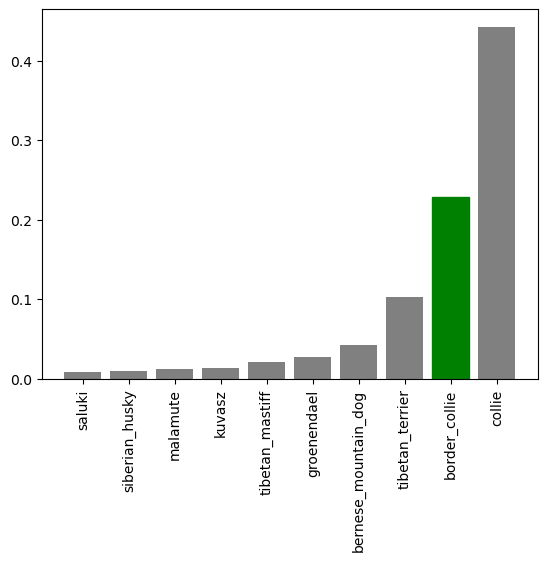

In [377]:
plot_pred_conf(prediction_probabilities=predictions,
              labels=val_labels,
              n=9)

In [379]:
uni[predictions[0].argsort()[-10:][::-1]]

array(['soft-coated_wheaten_terrier', 'norfolk_terrier', 'lhasa',
       'dandie_dinmont', 'cairn', 'west_highland_white_terrier',
       'border_terrier', 'komondor', 'miniature_poodle',
       'tibetan_terrier'], dtype=object)

In [381]:
    top_10_pred_index= pred_prob.argsort()


NameError: name 'pred_prob' is not defined

In [383]:
top_10_pred_val=pred_prob[op_10_pred_index]

NameError: name 'pred_prob' is not defined

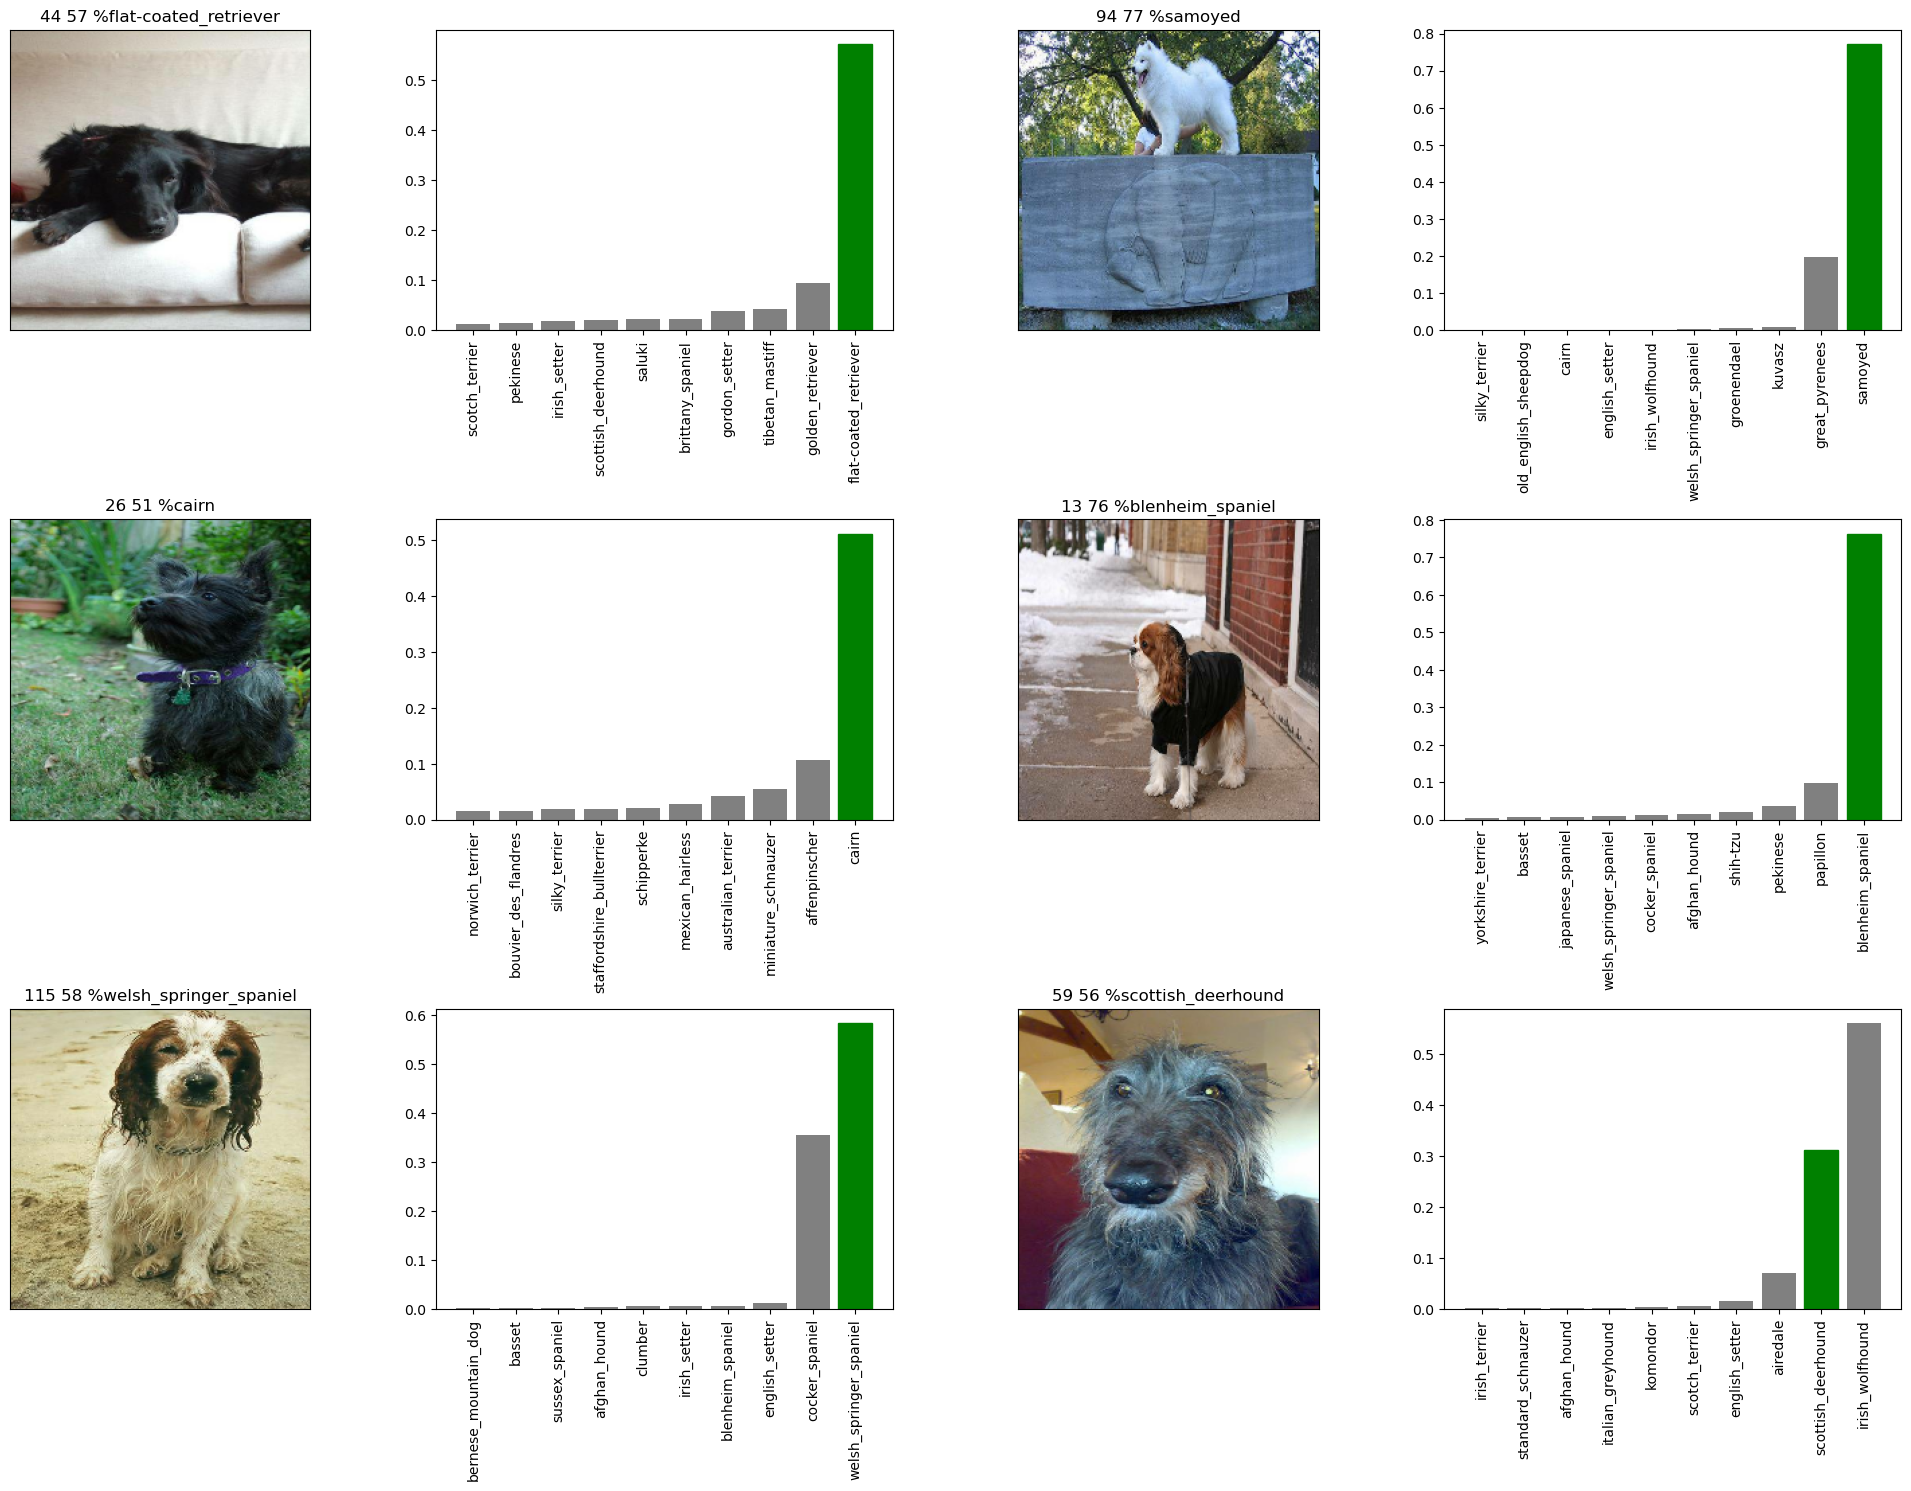

In [386]:
##now er got function to visuyalzie and eval the model

i_multipliers=20
num_rows=3
num_cols=2
num_images=num_rows*num_cols
plt.figure(figsize=(10*num_cols,5*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols,2*i+1)
    plot_pred(prediction_probabilities=predictions,
             labels=val_labels,
             images=val_images,
             n=i+i_multipliers)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_pred_conf(prediction_probabilities=predictions,
                  labels=val_labels,
                  n=i+i_multipliers)
plt.tight_layout(h_pad=1.0)
plt.show()

In [405]:
##saving and reloading the model

#cerate a fn to save a model

def save_model(model,suffix=None):
    modeldir = os.path.join("dawg/models",
                           datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

    model_path=modeldir+"-"+suffix+".h5"
    print(f"saving {model_path}")
    model.save(model_path)
    return model_path

In [423]:
##same like load
import tf_keras as tg
import tensorflow_hub as hub
def load_model(model_path):
    print(f"loading {model_path}")
    model=tg.models.load_model(model_path,
                              custom_objects={"keraslayer":hub.KerasLayer})
    return model

In [425]:
#save our model trained on 1000 images
save_model(model,suffix="1000-images-mobilenetv2-Adam")

saving dawg/models\20241029-014211-1000-images-mobilenetv2-Adam.h5


C:\Users\ADMIN\anaconda3\Lib\site-packages\tf_keras\src\engine\training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'dawg/models\\20241029-014211-1000-images-mobilenetv2-Adam.h5'

In [427]:
#try loading
import tf_keras as tg
import tensorflow_hub as hub
loaded_1000_image_model=load_model('dawg/models/20241029-013625-1000-images-mobilenetv2-Adam.h5')

loading dawg/models/20241029-013625-1000-images-mobilenetv2-Adam.h5


ValueError: Unknown layer: 'KerasLayer'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [429]:
model.evaluate(val_data)

7/7 [==============================] - 3s 248ms/step - loss: 1.3527 - accuracy: 0.6850


[1.352717638015747, 0.6850000023841858]

In [431]:
loaded_1000_image_model.evaluate(val_data)

NameError: name 'loaded_1000_image_model' is not defined

In [433]:
##trqainging bigdogmodel

len(x),len(y)

(10222, 10222)

In [435]:
x[:10]

['C:/Users/ADMIN/Downloads/dawg/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'C:/Users/ADMIN/Downloads/dawg/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'C:/Users/ADMIN/Downloads/dawg/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'C:/Users/ADMIN/Downloads/dawg/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'C:/Users/ADMIN/Downloads/dawg/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'C:/Users/ADMIN/Downloads/dawg/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'C:/Users/ADMIN/Downloads/dawg/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'C:/Users/ADMIN/Downloads/dawg/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'C:/Users/ADMIN/Downloads/dawg/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'C:/Users/ADMIN/Downloads/dawg/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [452]:
#create a data batc
full_data=create_data_batches(x,y)

creating training data batches


In [454]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [456]:
#create a model for full mdoel

full_model=create_model()

Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/5


In [462]:
#create full model callbacks

import tf_keras as tg
full_model_tensorboard=create_tensorboard_callback()
#no validation set when training on all the data , so we cant monitor validation accuracy
full_model_early_stopping=tg.callbacks.EarlyStopping(monitor="accuracy",
                                                     patience=3)

In [ ]:
NOTE: runtime takes nearly 30 mins to give output

In [464]:
#fit the full mdoel to full data


full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard,full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 166s 420ms/step - loss: 1.2921 - accuracy: 0.6759
Epoch 2/100
320/320 [==============================] - 137s 427ms/step - loss: 0.3780 - accuracy: 0.8851
Epoch 3/100
320/320 [==============================] - 132s 412ms/step - loss: 0.2201 - accuracy: 0.9367
Epoch 4/100
320/320 [==============================] - 136s 425ms/step - loss: 0.1418 - accuracy: 0.9644
Epoch 5/100
320/320 [==============================] - 134s 419ms/step - loss: 0.0971 - accuracy: 0.9809
Epoch 6/100
320/320 [==============================] - 138s 430ms/step - loss: 0.0701 - accuracy: 0.9880
Epoch 7/100
320/320 [==============================] - 137s 429ms/step - loss: 0.0525 - accuracy: 0.9931
Epoch 8/100
320/320 [==============================] - 137s 428ms/step - loss: 0.0416 - accuracy: 0.9949
Epoch 9/100
320/320 [==============================] - 135s 423ms/step - loss: 0.0328 - accuracy: 0.9974
Epoch 10/100
320/320 [==============================] -